<center><img src="https://github.com/girishksahu/INSAID2021/blob/SMART_AI_Learning/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Machine Learning Intermediate Project - Gender Recognition by Voice for Telecom Company</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2021/blob/ML-Intermediate-Gender-Recognition-by-Voice/gender-recognition-logo.jpg?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Pre-Processing**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Your client KPP Communications for this project is a Telecom company.

    - They are a leading telecom company with 5 million users.

    - They want to keep track of the number of male and female users but as the user count increases the task becomes more tedious.

    - They want to automate the process of keeping track of male and female users using their voice.

    - Their research and development teams are trying to understand the acoustic properties of the voice and speech so that they can use it to enhance the customer experience in their new product.


**<h3>Current Scenario:</h3>**

- Determining a person’s gender as male or female, based upon a sample of their voice, initially seems to be an easy task. 
- Often, the human ear can easily detect the difference between a male or a female voice within the first few spoken words.
- However, designing a computer program to do this turns out to be a bit trickier.
- Currently, the company is keeping track by manually entering the data for the user being male or female by listening to their voice which is a tedious task for the employees.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The current process suffers from the following problems:**
    - The current process is a manual classification of gender using their voice.

    - This is very tedious and time-consuming as it needs to be repeated every time a new customer joins.

- The company has hired you as a data science consultant.

    - They want to automate the process of predicting the male or female voice using acoustic properties of the voice or speech rather than doing this manual work.


<a name = Section21></a>
### **Your Role**

- You are given a dataset consisting of recorded voice samples, collected from male and female speakers.

- Your task is to build a classification model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

<a name = Section21></a>
### **Project Deliverables**
- Deliverable: **Gender prediction using voice.**

- Machine Learning Task: **Classification.**

- Target Variable: **label**
- Win Condition: **N/A (best possible model)**

<a name = Section21></a>
### **Evaluation Metric**

- The model evaluation will be based on the F1-Score score.

<center><img src="https://github.com/girishksahu/INSAID2021/blob/ML-Intermediate-Gender-Recognition-by-Voice/gender-recognition.jpg?raw=true"></center>

---
<a name = Section3></a>
# **3. Importing Libraries**
---

<a name = Section31></a>
### **3.1 Version Check**

In [147]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show


python version 3.8.5


<a name = Section32></a>
### **3.2 Importing Libraries**

In [148]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import plot_roc_curve
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier 
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

pandas version 1.1.3
numpy version 1.19.2
seaborn version 0.11.0
sklearn version 0.24.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The **dataset** consists of the information about **Acoustic Properties** of the voice and speech which helps identify voice as male or female.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 2851 | 22 | 490 KB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Id**   | Unique Id of the record |
|02| **meanfreq**      | Mean frequency (in kHz) for the voice sample|
|03| **sd**        | Standard deviation of the frequency|
|04| **median**          | Median frequency (in kHz) for the voice sample|
|05| **Q25**      | First quantile (in kHz) |
|06| **Q75**           | Third quantile (in kHz)|
|07| **IQR**     | Interquartile range (in kHz) |
|08| **skew**     | Skewness of the voice sample|
|09| **kurt**        | Kurtosis of the voice sample                                         |
|10| **sp.ent**          | Spectral entropy                                   |
|11| **sfm**         | Spectral flatness of the voice sample  |
|12| **mode**     | Mode frequency                                   |
|13| **centroid**     | 	Frequency centroid                                  |
|14| **peakf**     | Peak frequency (the frequency with the highest energy)                                  |
|15| **meanfun**     | Average of fundamental frequency measured across the acoustic signal           |
|16| **minfun**     | Minimum fundamental frequency measured across the acoustic signal           |
|17| **maxfun**     | Maximum fundamental frequency measured across the acoustic signal                              |
|18| **meandom**     | Average of dominant frequency measured across the acoustic signal                                  |
|19| **mindom**     | Minimum of dominant frequency measured across the acoustic signal                                  |
|20| **maxdom**     | Maximum of dominant frequency measured across the acoustic signal                                  |
|21| **dfrange**     | Range of dominant frequency measured across the acoustic signal                                  |
|22| **modindx**     | Modulation index. Calculated as the accumulated absolute difference between adjacent Measurements of fundamental frequencies divided by the frequency range|
|23| **label**     | The label for the voice sample (male or female)|

- The **Test dataset** consists of the information about **Acoustic Properties for Voice and Speech** and **label** need to be predicted which provides gender information for that voice and speech.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 317 | 21 | 52 KB | 

<br>

- Load KPP Communications Gender recognition for Voice and Speech Data to be used for Training and Validation

In [149]:
# Id is unique ID for record and can be used as label for index
gender_master_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021/ML-Intermediate-Gender-Recognition-by-Voice/voice_train.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', gender_master_data.shape)

# Output first 10 data rows
gender_master_data.head(10)


Shape of the Training and Validation dataset: (2851, 21)


meanfreq        sd    median       Q25       Q75       IQR      skew  \
Id                                                                           
765   0.162337  0.058206  0.174065  0.100225  0.196512  0.096287  2.127226   
3071  0.161653  0.057435  0.170138  0.157522  0.182929  0.025407  6.968850   
1546  0.165290  0.061891  0.135071  0.118468  0.225176  0.106708  2.631865   
410   0.188100  0.055735  0.206028  0.130493  0.229470  0.098977  1.538406   
2689  0.187497  0.044226  0.190071  0.156800  0.215435  0.058635  1.653083   
25    0.164700  0.075362  0.147018  0.118698  0.240475  0.121777  4.208608   
2641  0.204961  0.036409  0.204117  0.191149  0.225729  0.034580  2.813954   
1913  0.078847  0.068473  0.054163  0.022843  0.127637  0.104794  2.422417   
1971  0.228903  0.041596  0.236905  0.208646  0.259277  0.050631  2.073639   
439   0.183125  0.059820  0.202360  0.132979  0.227552  0.094572  2.120305   

           kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
Id                                                                            
765    7.815129  0.921533  0.426868  0.195134  0.162337  0.095852  0.016754   
3071  60.968047  0.870409  0.459881  0.171014  0.161653  0.163486  0.015601   
1546  12.629116  0.918897  0.413620  0.129191  0.165290  0.120050  0.035088   
410    5.145753  0.914325  0.398674  0.222698  0.188100  0.108470  0.021305   
2689   5.839465  0.907477  0.337921  0.196000  0.187497  0.154529  0.048338   
25    43.681885  0.940669  0.604020  0.059965  0.164700  0.082963  0.015640   
2641  12.806080  0.862543  0.259556  0.202676  0.204961  0.154035  0.048000   
1913   9.575713  0.930185  0.581113  0.024491  0.078847  0.138373  0.016293   
1971   7.742316  0.866409  0.163200  0.258570  0.228903  0.177575  0.019925   
439    8.974592  0.925890  0.528520  0.225900  0.183125  0.114168  0.034934   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
Id                                                                        
765   0.235294  0.406033  0.046875  3.484375  3.437500  0.155348    male  
3071  0.204082  0.595161  0.170898  3.979492  3.808594  0.209073  female  
1546  0.222222  0.458577  0.087891  1.015625  0.927734  0.459834    male  
410   0.145455  0.493229  0.125000  4.734375  4.609375  0.105202    male  
2689  0.279070  1.113502  0.023438  8.765625  8.742188  0.103095  female  
25    0.253968  0.143353  0.007812  1.062500  1.054688  0.125926    male  
2641  0.277457  1.505701  0.023438  9.070312  9.046875  0.154631  female  
1913  0.271186  0.436663  0.007812  5.328125  5.320312  0.106574  female  
1971  0.275862  0.429688  0.007812  2.718750  2.710938  0.148991  female  
439   0.183908  0.627298  0.156250  5.101562  4.945312  0.158610    male

- Load KPP Communications Gender recognition for Voice and Speech Test Data to be used for Prediction

In [150]:
# Id is unique ID for record and can be used as label for index
gender_test_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021/ML-Intermediate-Gender-Recognition-by-Voice/voice_test.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Test dataset to be used for Prediction:', gender_test_data.shape)

# Output first 10 data rows
gender_test_data.head(10)

Shape of the Test dataset to be used for Prediction: (317, 20)


meanfreq        sd    median       Q25       Q75       IQR      skew  \
Id                                                                           
2148  0.186833  0.027472  0.184325  0.173955  0.204731  0.030777  2.655225   
1124  0.188879  0.060316  0.195537  0.138072  0.242975  0.104904  1.497393   
170   0.150705  0.087127  0.174299  0.069666  0.226082  0.156416  2.603951   
3158  0.183667  0.040607  0.182534  0.156480  0.207646  0.051166  2.054138   
2229  0.205159  0.039543  0.210805  0.186667  0.228908  0.042241  2.099683   
1960  0.141798  0.086852  0.167028  0.044903  0.217365  0.172462  1.027733   
411   0.186064  0.056933  0.207961  0.128311  0.226718  0.098408  2.222237   
457   0.138354  0.069580  0.125502  0.090232  0.202102  0.111870  1.905304   
2881  0.201499  0.036106  0.200000  0.188706  0.218353  0.029647  2.903027   
602   0.169100  0.054076  0.183930  0.120499  0.213900  0.093402  2.513793   

           kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
Id                                                                            
2148  10.565846  0.821812  0.159883  0.180645  0.186833  0.172790  0.023495   
1124   5.037085  0.909425  0.374225  0.140386  0.188879  0.133092  0.050847   
170   22.328899  0.969287  0.781729  0.050181  0.150705  0.109992  0.017260   
3158   7.483019  0.898138  0.313925  0.177040  0.183667  0.149237  0.018648   
2229   7.562209  0.876002  0.271880  0.224885  0.205159  0.154736  0.047105   
1960   3.588617  0.965640  0.758995  0.191052  0.141798  0.181397  0.084211   
411    8.968452  0.912176  0.416085  0.226447  0.186064  0.109011  0.039409   
457    8.095749  0.964538  0.752012  0.102782  0.138354  0.108021  0.016032   
2881  11.258758  0.835137  0.251416  0.186824  0.201499  0.168405  0.056738   
602   12.263631  0.900882  0.333114  0.000000  0.169100  0.102248  0.017094   

        maxfun   meandom    mindom     maxdom    dfrange   modindx  
Id                                                                  
2148  0.271186  0.178571  0.007812   0.226562   0.218750  0.108929  
1124  0.272727  0.855938  0.023438   8.718750   8.695312  0.098712  
170   0.266667  1.240954  0.007812   5.562500   5.554688  0.332396  
3158  0.262295  0.550312  0.007812   3.421875   3.414062  0.166503  
2229  0.277457  1.578835  0.187500  10.804688  10.617188  0.113644  
1960  0.258065  0.445747  0.031250   0.929688   0.898438  0.386701  
411   0.164948  0.481027  0.007812   2.718750   2.710938  0.181876  
457   0.275862  0.166667  0.007812   2.328125   2.320312  0.019881  
2881  0.271186  0.856585  0.023438   5.226562   5.203125  0.057182  
602   0.213333  0.221236  0.007812   0.695312   0.687500  0.217532

In [151]:
# Check for any missing values
any(gender_master_data.isna().sum())

False

In [152]:
#check if any duplicate row
any(gender_master_data.duplicated())

True

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [153]:
#Basic statistical details for numeric variables
gender_master_data.describe(include=[np.float64]).transpose()

count       mean         std       min       25%       50%  \
meanfreq  2851.0   0.180923    0.029796  0.039363  0.163739  0.184848   
sd        2851.0   0.057143    0.016588  0.018363  0.042082  0.059151   
median    2851.0   0.185722    0.036175  0.010975  0.169726  0.190067   
Q25       2851.0   0.140349    0.048628  0.000229  0.111139  0.140229   
Q75       2851.0   0.224730    0.023509  0.042946  0.208756  0.225729   
IQR       2851.0   0.084381    0.042728  0.014558  0.042663  0.094235   
skew      2851.0   3.118469    4.163727  0.141735  1.638410  2.183320   
kurt      2851.0  35.808329  131.430900  2.068455  5.604497  8.255809   
sp.ent    2851.0   0.895312    0.044795  0.738651  0.862190  0.901840   
sfm       2851.0   0.408473    0.176880  0.036876  0.259191  0.396548   
mode      2851.0   0.165481    0.076918  0.000000  0.118100  0.186667   
centroid  2851.0   0.180923    0.029796  0.039363  0.163739  0.184848   
meanfun   2851.0   0.142891    0.032191  0.055565  0.117578  0.140678   
minfun    2851.0   0.036834    0.019182  0.009775  0.018223  0.046921   
maxfun    2851.0   0.258968    0.029806  0.108696  0.253968  0.271186   
meandom   2851.0   0.833608    0.525565  0.007812  0.423799  0.767578   
mindom    2851.0   0.052634    0.062982  0.004883  0.007812  0.023438   
maxdom    2851.0   5.075745    3.526201  0.007812  2.207031  4.992188   
dfrange   2851.0   5.023111    3.525193  0.000000  2.183594  4.968750   
modindx   2851.0   0.173933    0.119463  0.000000  0.099591  0.139159   

                75%          max  
meanfreq   0.199061     0.251124  
sd         0.066891     0.115273  
median     0.210650     0.261224  
Q25        0.175690     0.247347  
Q75        0.243700     0.273469  
IQR        0.114208     0.252225  
skew       2.932962    34.725453  
kurt      13.649354  1309.612887  
sp.ent     0.928727     0.981997  
sfm        0.533495     0.842936  
mode       0.221341     0.280000  
centroid   0.199061     0.251124  
meanfun    0.169593     0.237636  
minfun     0.047904     0.204082  
maxfun     0.277457     0.279114  
meandom    1.180411     2.957682  
mindom     0.070312     0.458984  
maxdom     7.078125    21.867188  
dfrange    7.042969    21.843750  
modindx    0.209525     0.932374

**Observations:**
- Total count for all numeric variables is same as 2851 which confirms that there are no missing values.
- Most of them have mean and median same which means normal distribution.

In [154]:
#Basic statistical details for categorical variables
gender_master_data.describe(include=[np.object])

label
count     2851
unique       2
top     female
freq      1432

**Observations:**
- Total count for all categorical variables is same as 2851 which confirms that there are no missing values. 
- **label** feature has majority of category as **female** 

In [155]:
# Check any duplicate rows
gender_master_data.duplicated().sum()

1

In [219]:
gender_master_data.drop_duplicates()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
Id                                                                            
765   0.162337  0.058206  0.174065  0.100225  0.196512  0.096287   2.127226   
3071  0.161653  0.057435  0.170138  0.157522  0.182929  0.025407   6.968850   
1546  0.165290  0.061891  0.135071  0.118468  0.225176  0.106708   2.631865   
410   0.188100  0.055735  0.206028  0.130493  0.229470  0.098977   1.538406   
2689  0.187497  0.044226  0.190071  0.156800  0.215435  0.058635   1.653083   
25    0.164700  0.075362  0.147018  0.118698  0.240475  0.121777   4.208608   
2641  0.204961  0.036409  0.204117  0.191149  0.225729  0.034580   2.813954   
1913  0.078847  0.068473  0.054163  0.022843  0.127637  0.104794   2.422417   
1971  0.228903  0.041596  0.236905  0.208646  0.259277  0.050631   2.073639   
439   0.183125  0.059820  0.202360  0.132979  0.227552  0.094572   2.120305   
3096  0.159184  0.057233  0.170284  0.152633  0.181187  0.028554   7.021591   
1211  0.193500  0.059756  0.205847  0.134935  0.248799  0.113864   1.908696   
1320  0.197826  0.061653  0.221027  0.136164  0.241164  0.105000   1.719663   
1779  0.187074  0.035344  0.183430  0.170834  0.208097  0.037263   2.320217   
2069  0.131296  0.065613  0.145728  0.089056  0.165128  0.076072   5.481416   
2019  0.175181  0.075909  0.211126  0.108398  0.233139  0.124741   2.658596   
449   0.177096  0.060335  0.183380  0.132113  0.220845  0.088732   0.891425   
2154  0.184780  0.028732  0.184286  0.174286  0.196735  0.022449   3.044452   
67    0.167334  0.047178  0.161802  0.135475  0.180725  0.045250   3.961908   
538   0.148505  0.093163  0.172496  0.085515  0.225596  0.140081  32.350739   
555   0.177154  0.066538  0.179764  0.120945  0.237017  0.116072   1.373611   
1419  0.187813  0.059737  0.189562  0.154818  0.238613  0.083796   1.186347   
31    0.166659  0.075961  0.142781  0.122075  0.245077  0.123002   3.281848   
527   0.130042  0.084853  0.124827  0.072428  0.213642  0.141214  25.276060   
2744  0.198600  0.034093  0.201526  0.182000  0.217000  0.035000   2.319009   
2892  0.210082  0.042386  0.212616  0.191271  0.236891  0.045620   1.686742   
2011  0.134813  0.084461  0.150429  0.050354  0.212581  0.162227   1.423101   
2194  0.191306  0.044830  0.188204  0.166985  0.213114  0.046129   1.979427   
1703  0.192677  0.070494  0.215170  0.176886  0.241437  0.064551   2.166917   
2024  0.184957  0.057896  0.201618  0.172319  0.219741  0.047422   2.298217   
2936  0.159797  0.068732  0.164831  0.125624  0.205998  0.080373   5.123926   
343   0.155435  0.061934  0.148014  0.104283  0.208170  0.103887   3.333764   
1097  0.203080  0.060561  0.220146  0.139795  0.257042  0.117247   1.976321   
443   0.188611  0.070799  0.199248  0.132978  0.258934  0.125956   2.815702   
166   0.166469  0.077571  0.179003  0.108387  0.230117  0.121730   3.341124   
124   0.172346  0.072829  0.184861  0.097023  0.240908  0.143886  15.812252   
2608  0.231283  0.027903  0.235789  0.218695  0.246989  0.028295   2.164549   
2170  0.193317  0.036190  0.195979  0.182117  0.212186  0.030069   2.679544   
596   0.169310  0.055438  0.186981  0.121043  0.211707  0.090664   2.667088   
3124  0.206928  0.070170  0.233604  0.208202  0.248451  0.040249   2.685948   
1689  0.169935  0.094921  0.197082  0.070501  0.251960  0.181459   1.232448   
1569  0.159888  0.059352  0.137289  0.112455  0.218963  0.106508   2.725312   
1376  0.197676  0.056322  0.218584  0.147979  0.247599  0.099620   1.476049   
1114  0.175311  0.068150  0.160749  0.127551  0.241997  0.114446   1.438899   
2749  0.184703  0.033982  0.181739  0.165217  0.203478  0.038261   2.342371   
1756  0.180750  0.035288  0.181149  0.169088  0.190135  0.021047   3.196902   
1877  0.183433  0.049427  0.173186  0.151098  0.212774  0.061677   2.549621   
3123  0.190512  0.074728  0.215463  0.189673  0.240998  0.051325   1.834782   
691   0.157644  0.060679  0.175900  0.097095  0.197693  

In [220]:
gender_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2851 entries, 765 to 860
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  2851 non-null   float64
 1   sd        2851 non-null   float64
 2   median    2851 non-null   float64
 3   Q25       2851 non-null   float64
 4   Q75       2851 non-null   float64
 5   IQR       2851 non-null   float64
 6   skew      2851 non-null   float64
 7   kurt      2851 non-null   float64
 8   sp.ent    2851 non-null   float64
 9   sfm       2851 non-null   float64
 10  mode      2851 non-null   float64
 11  centroid  2851 non-null   float64
 12  meanfun   2851 non-null   float64
 13  minfun    2851 non-null   float64
 14  maxfun    2851 non-null   float64
 15  meandom   2851 non-null   float64
 16  mindom    2851 non-null   float64
 17  maxdom    2851 non-null   float64
 18  dfrange   2851 non-null   float64
 19  modindx   2851 non-null   float64
dtypes: float64(20)
memory usage: 

In [156]:
# Columns list can be handy and useful for further steps
gender_master_data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [157]:
# Check column data types and any null values
gender_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2851 entries, 765 to 860
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  2851 non-null   float64
 1   sd        2851 non-null   float64
 2   median    2851 non-null   float64
 3   Q25       2851 non-null   float64
 4   Q75       2851 non-null   float64
 5   IQR       2851 non-null   float64
 6   skew      2851 non-null   float64
 7   kurt      2851 non-null   float64
 8   sp.ent    2851 non-null   float64
 9   sfm       2851 non-null   float64
 10  mode      2851 non-null   float64
 11  centroid  2851 non-null   float64
 12  meanfun   2851 non-null   float64
 13  minfun    2851 non-null   float64
 14  maxfun    2851 non-null   float64
 15  meandom   2851 non-null   float64
 16  mindom    2851 non-null   float64
 17  maxdom    2851 non-null   float64
 18  dfrange   2851 non-null   float64
 19  modindx   2851 non-null   float64
 20  label     2851 non-null   obj

In [158]:
gender_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 2148 to 1488
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  317 non-null    float64
 1   sd        317 non-null    float64
 2   median    317 non-null    float64
 3   Q25       317 non-null    float64
 4   Q75       317 non-null    float64
 5   IQR       317 non-null    float64
 6   skew      317 non-null    float64
 7   kurt      317 non-null    float64
 8   sp.ent    317 non-null    float64
 9   sfm       317 non-null    float64
 10  mode      317 non-null    float64
 11  centroid  317 non-null    float64
 12  meanfun   317 non-null    float64
 13  minfun    317 non-null    float64
 14  maxfun    317 non-null    float64
 15  meandom   317 non-null    float64
 16  mindom    317 non-null    float64
 17  maxdom    317 non-null    float64
 18  dfrange   317 non-null    float64
 19  modindx   317 non-null    float64
dtypes: float64(20)
memory usage:

**Observations:**

- Total Non-Null count for each column is same as 8124 which means there is no missing values.
- There are **20 Numerical features** with 1 column as object feature.
- **Id** column has been set as index while data load.

In [159]:
# Get list of categorical variables
s = (gender_master_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['label']


In [160]:
# Get list of numerical variables
s = (gender_master_data.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [161]:
profile = ProfileReport(df=gender_master_data)
profile.to_file(output_file='Gender-Recognition Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


**Observations:**

- The report shows that there are a **total** of **22 features** out of which **21** are **numerical**, **1** is **categorical**.

- **label** Categorical feature has balanced data with **1432** identified as female and **1419** as male.

- All the features has equal number of records **2851** which means there are no missing values.

- **mode** feature has around 7.2% as Zero values.

- **dfrange** feature has around 1.9% as Zero values.

- **modindx** feature has around 1.9% as Zero values.

- **Postive Skewed Features: (Mean > Median)**
 - skew,
 - kurt, 
 - mindom, 
 - maxdom, 
 - dfrange, 
 - modindx, 
- **Negative Skewed Features: (Mean < Median)**
 - median
 - Q75
 - maxfun
- **~ Normally Distributed Features: (Mean = Median = Mode)**
 - meanfreq
 - sd
 - Q25
 - IQR
 - sp.ent
 - sfm
 - mode
 - centroid
 - meanfun
 - meandom

- For detailed information, please check **Gender-Recognition Pre Profiling Report.html** file.

<a name = Section52></a>
### **5.2 Data Pre-Processing**

- There are no missing values and data appears clean so far but we need to pre process few features before EDA and Model Evaluation

<a name = Section53></a>
### **5.3 Data Post-Profiling**

- We can run the report to get latest information

In [162]:
# post_profile=ProfileReport(df=cust_master_data)
# post_profile.to_file(output_file='Customer-classification Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Not Applicable

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

**Q: What is the breakdown of Customers having children?**

In [163]:
gender_master_data['label'].value_counts()

female    1432
male      1419
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

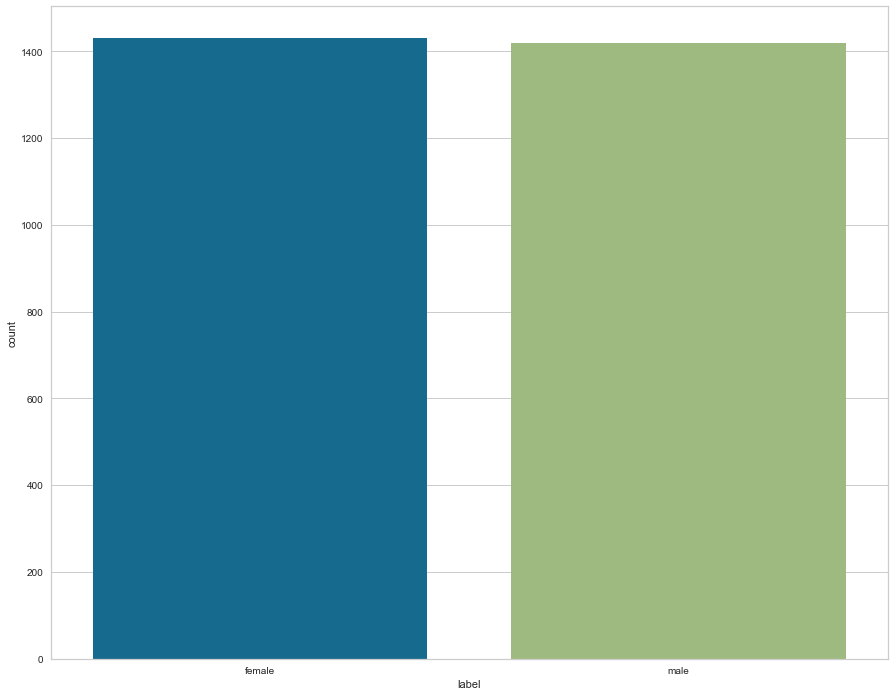

In [164]:
plt.figure(figsize=(15,12))
sns.countplot(x='label',data=gender_master_data,order=gender_master_data['label'].value_counts().index)

**Below are various plots for Numeric feature distribution to get different view point for better data understanding**

<Figure size 3600x1800 with 0 Axes>

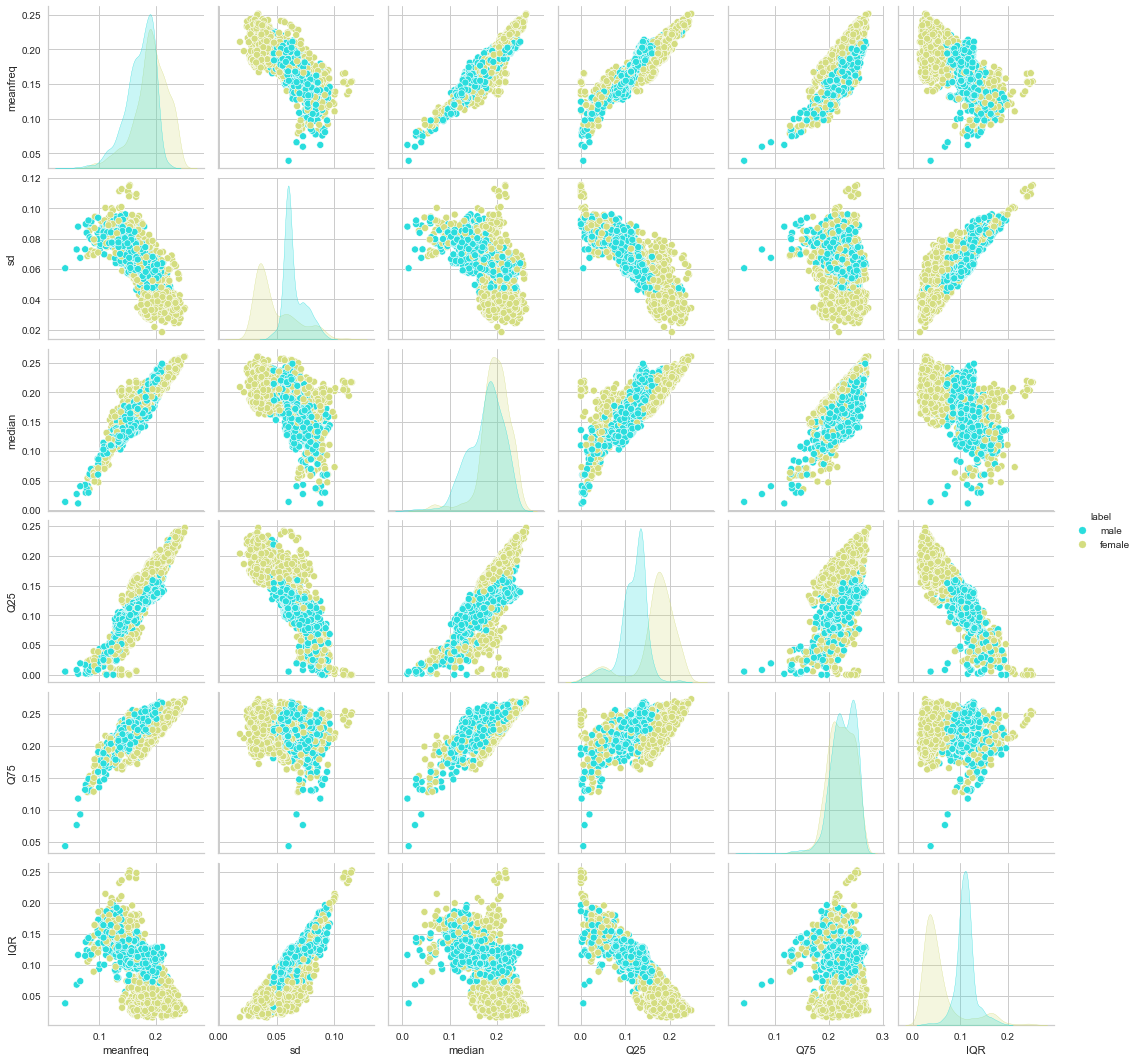

In [165]:
plt.figure(figsize=(50,25))
sns.pairplot(gender_master_data[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR','label']],palette='rainbow',diag_kind='kde',hue="label")

<Figure size 3600x1800 with 0 Axes>

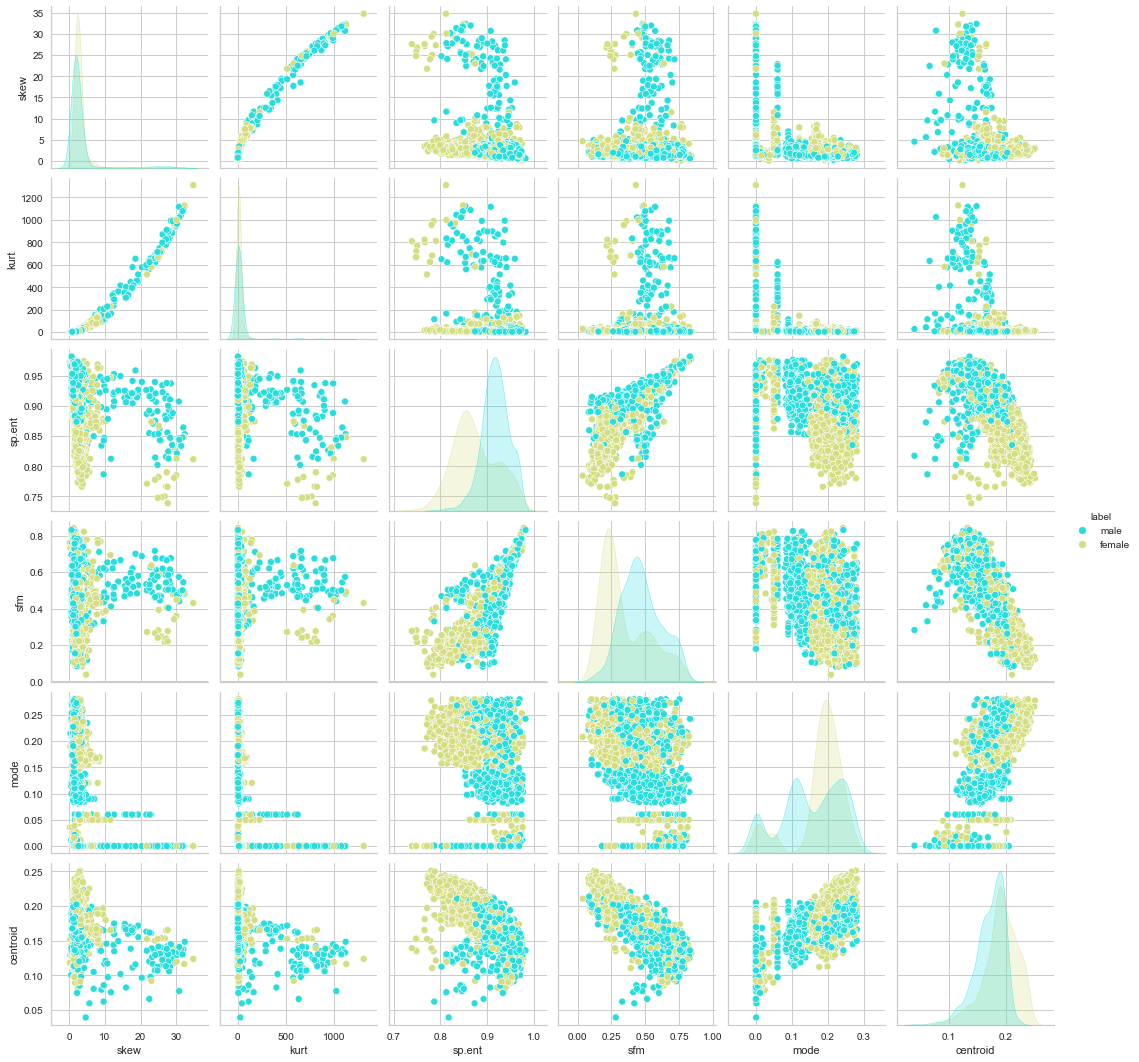

In [166]:
plt.figure(figsize=(50,25))
sns.pairplot(gender_master_data[['skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid','label']],palette='rainbow',diag_kind='kde',hue="label")

<Figure size 3600x1800 with 0 Axes>

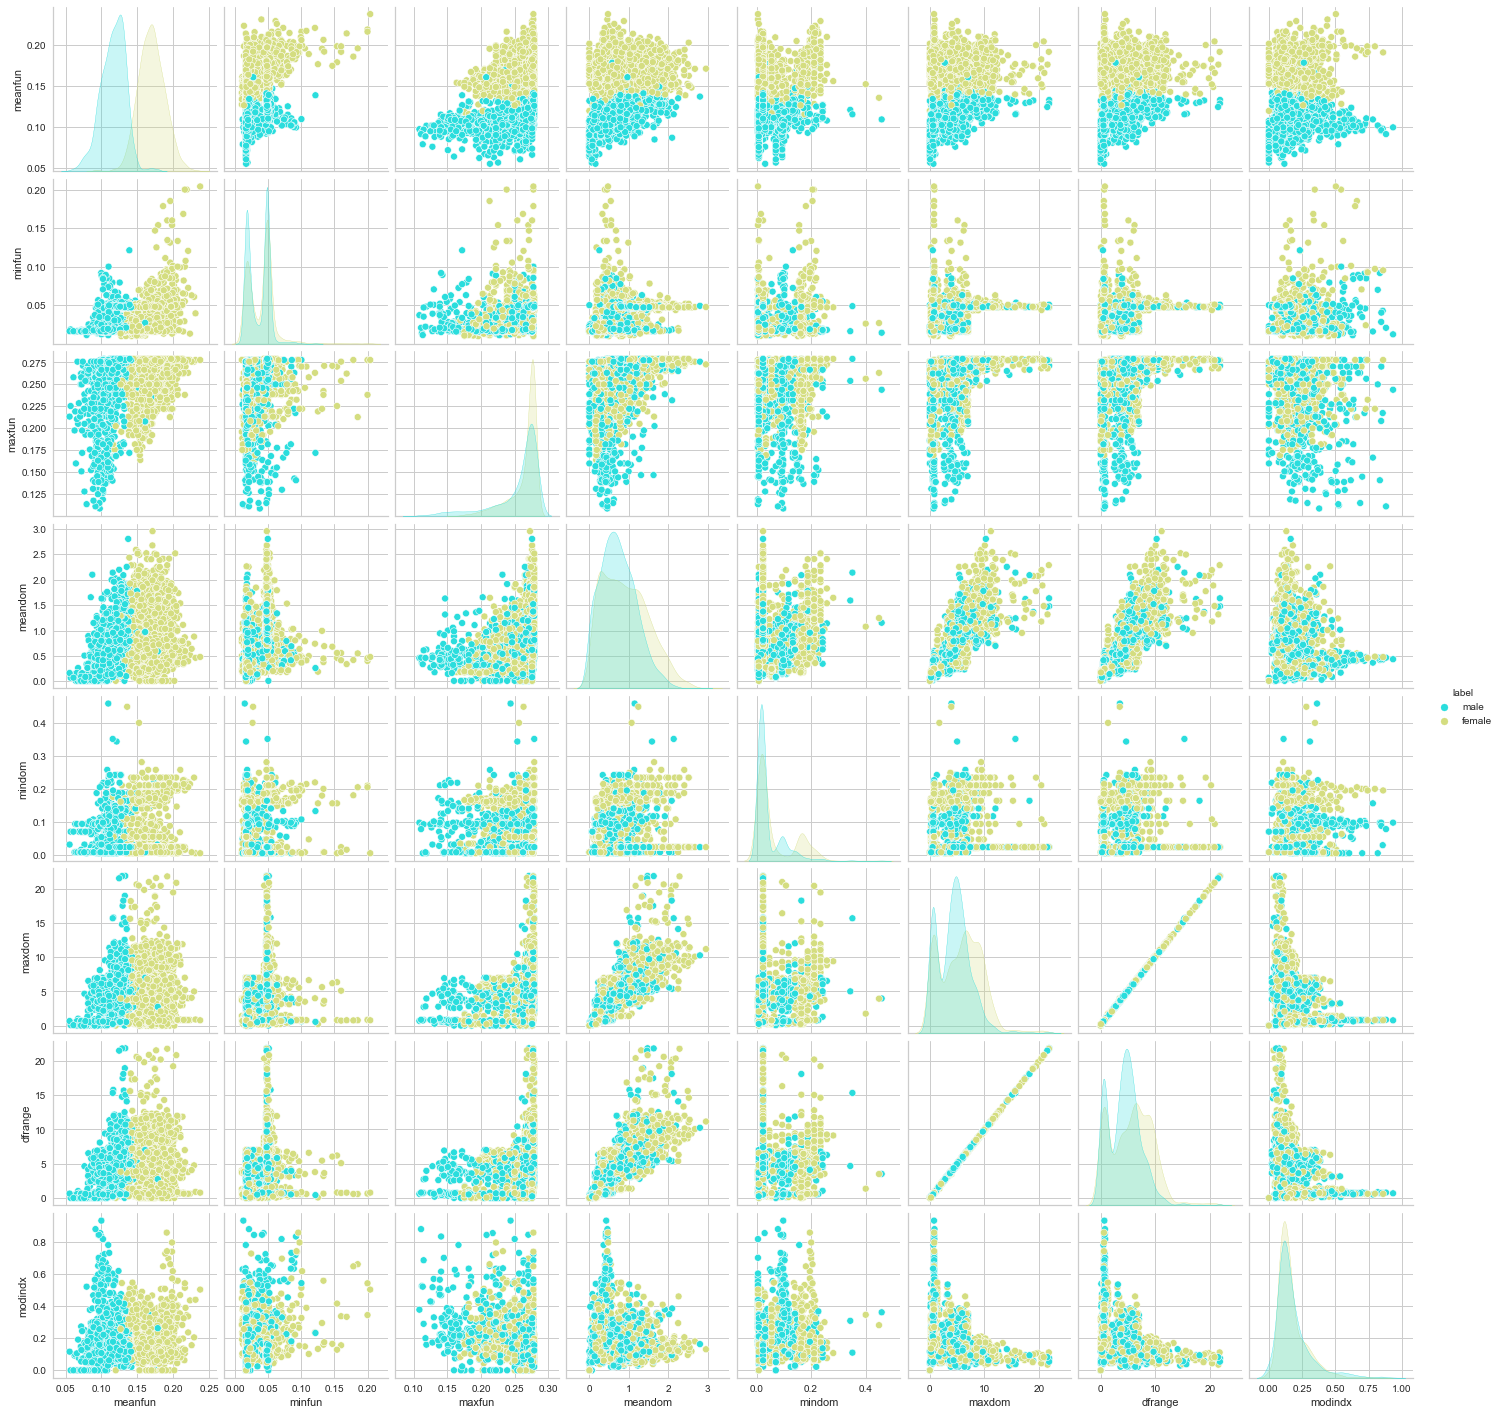

In [167]:
plt.figure(figsize=(50,25))
sns.pairplot(gender_master_data[['meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx','label']],palette='rainbow',diag_kind='kde',hue="label")

<AxesSubplot:xlabel='label'>

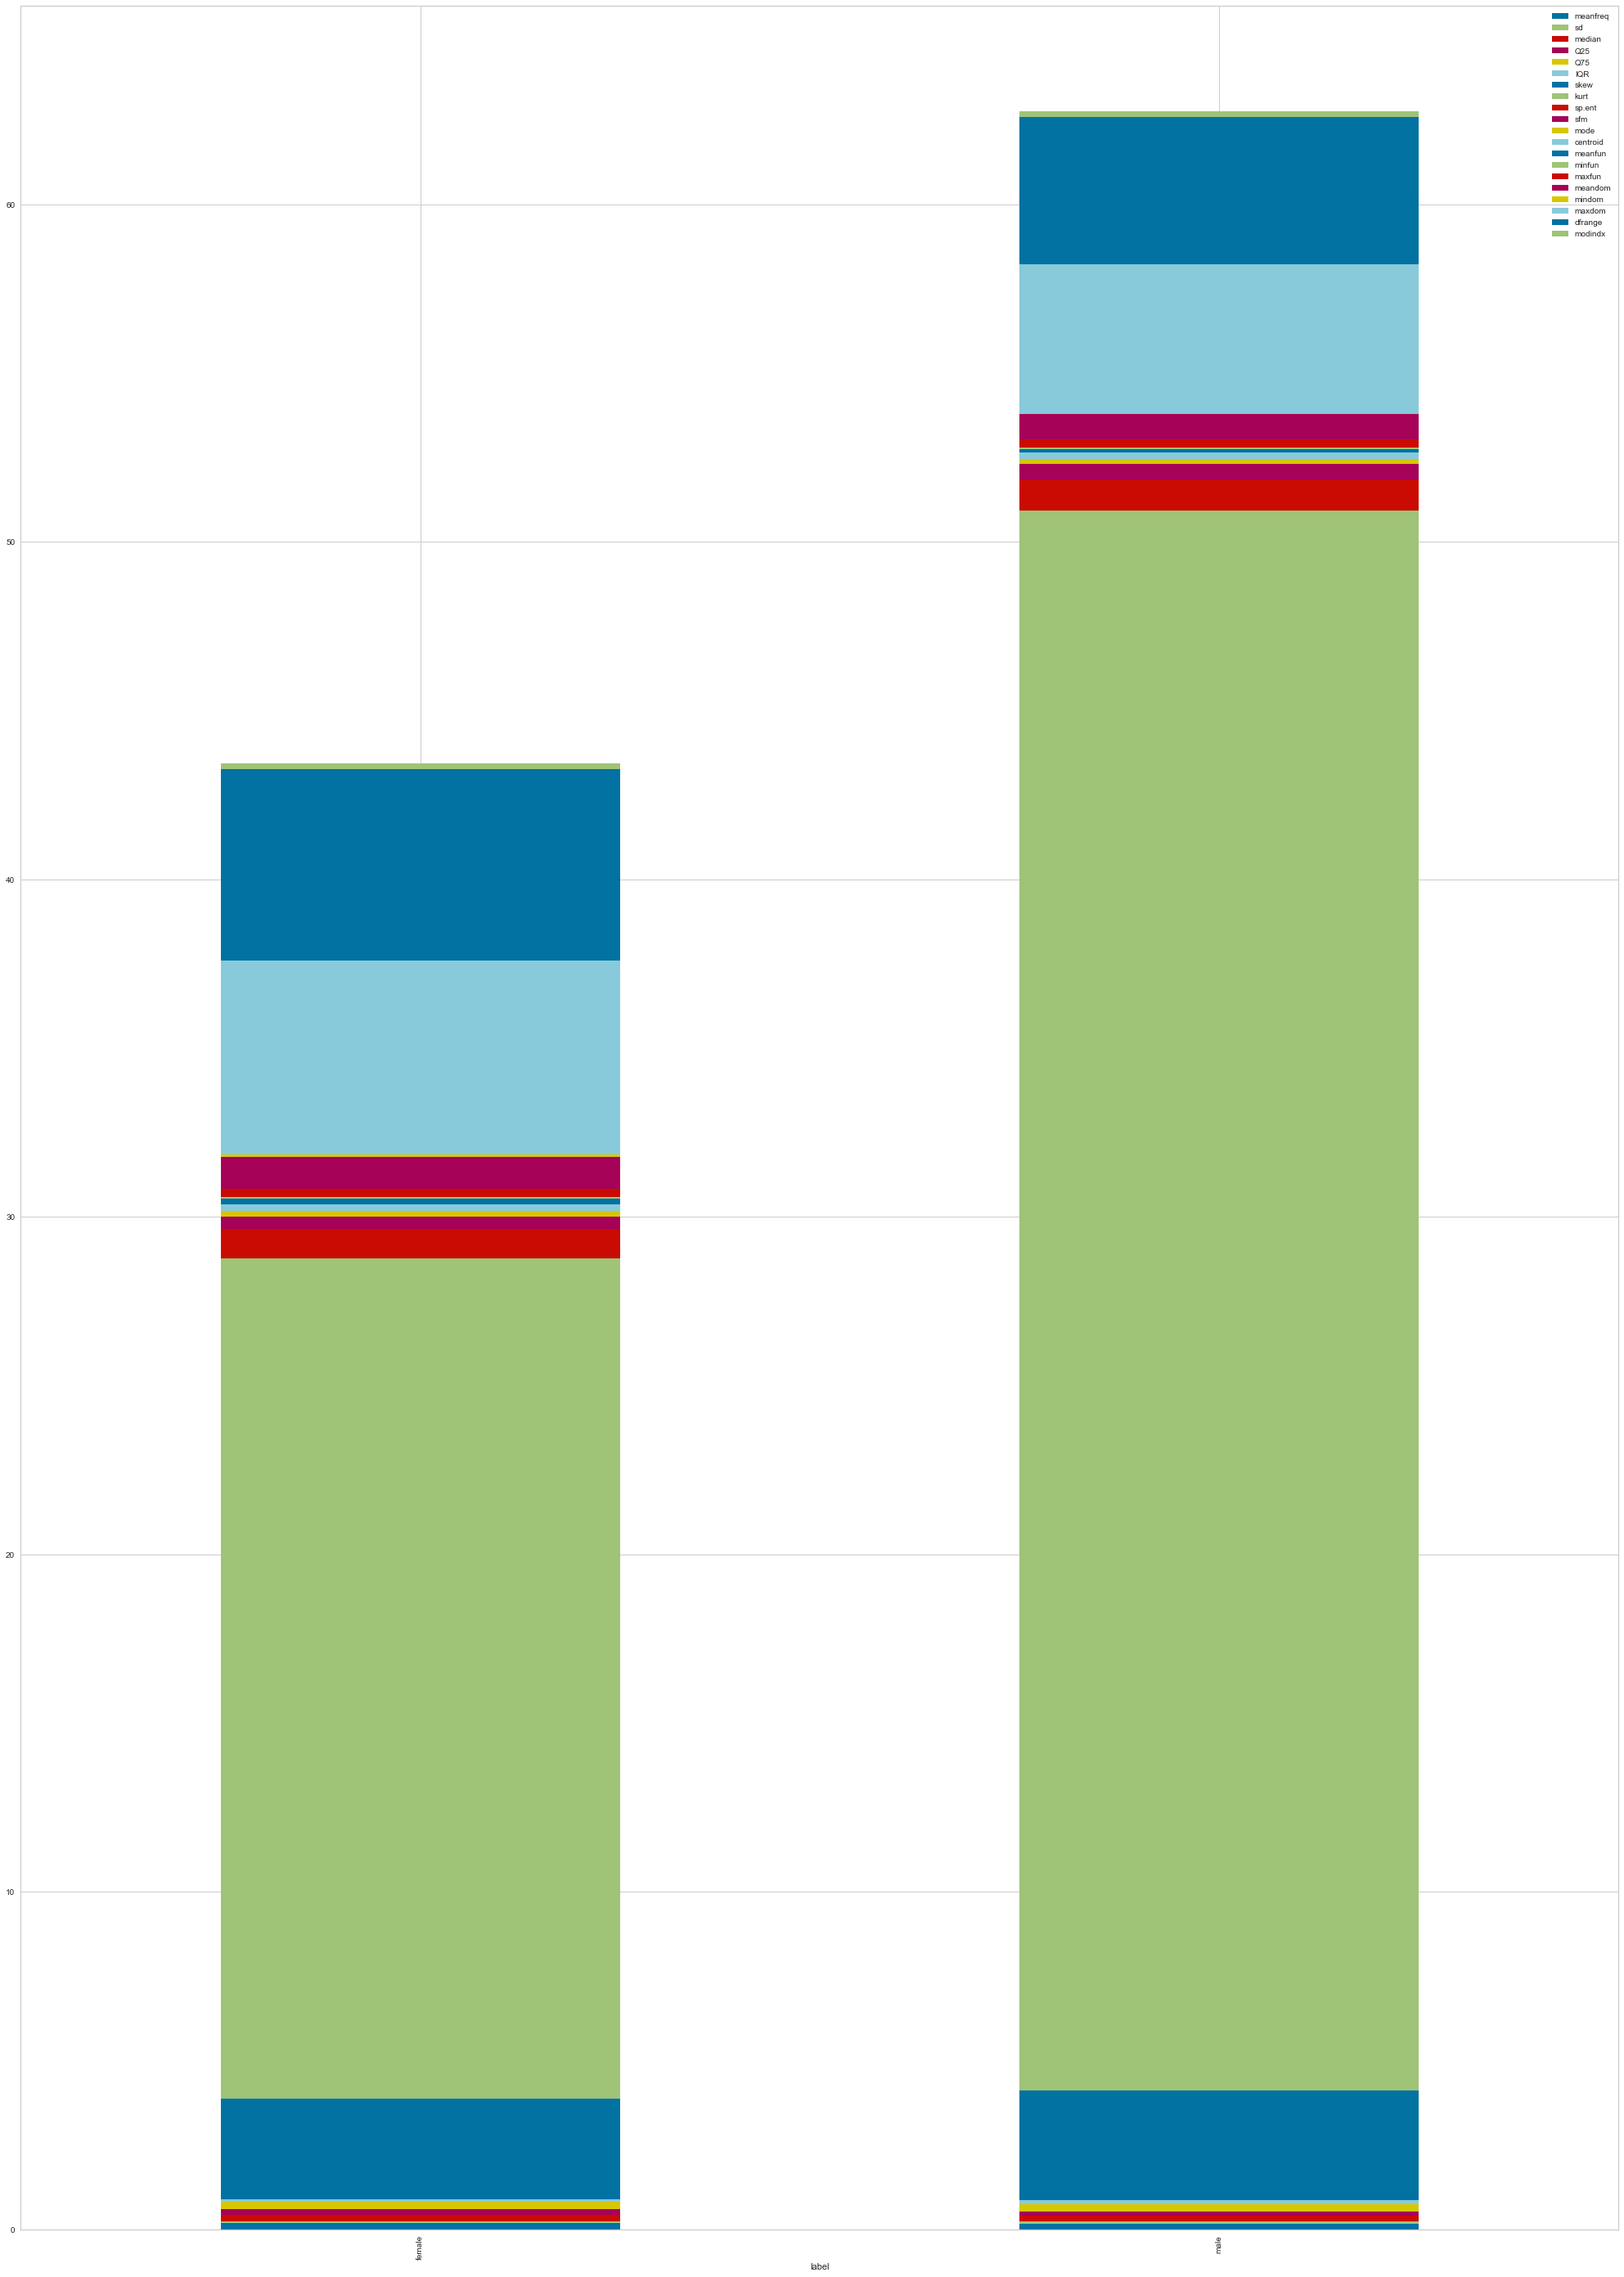

In [181]:
gender_master_data.groupby(['label'])[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']].mean().plot(kind='bar', figsize=(35, 50), stacked=True)

Text(0.5, 1.0, 'Correlation between Numerical features and target variable')

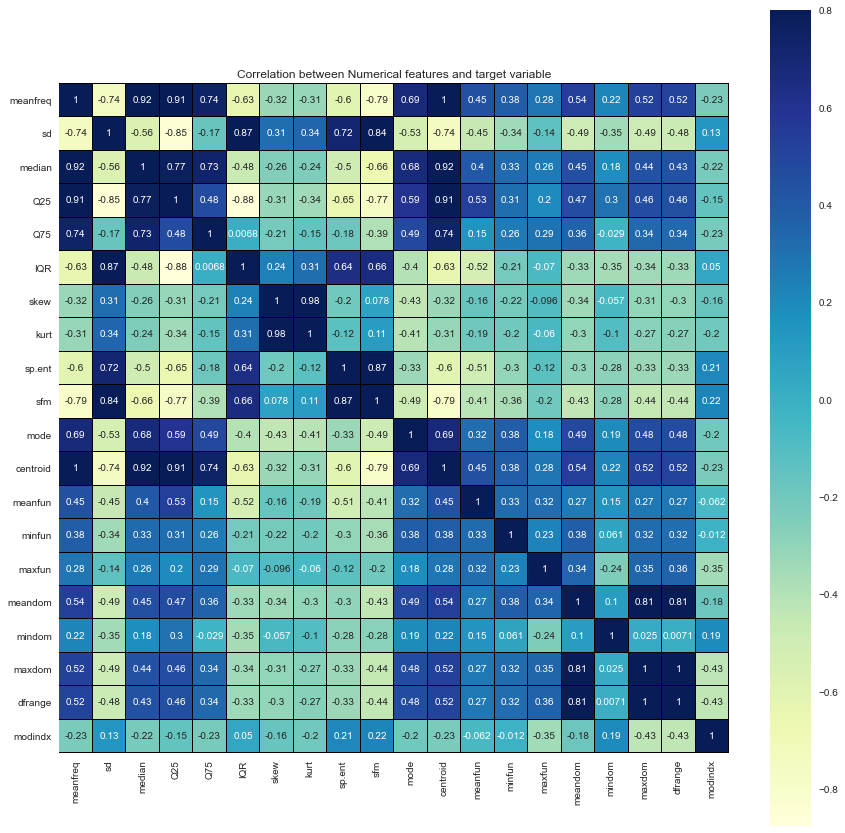

In [182]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = gender_master_data.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features and target variable')

**Observations:**

- There is strong positive correlation for **meanfreq** with **median** and **Q25**
- There is strong positive correlation for **median** with **centroid**
- There is strong positive correlation for **Q25** with **centroid**
- There is higher positive correlation for **IQR** with **sd**
- There is higher positive correlation for **Q75** with **centroid**
- There is positive correlation for **median** with **Q25** and **Q75**

In [183]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
gender_master_data.cov()

meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  0.000888 -0.000367  0.000996  0.001320  0.000520 -0.000800   
sd       -0.000367  0.000275 -0.000338 -0.000685 -0.000065  0.000619   
median    0.000996 -0.000338  0.001309  0.001359  0.000623 -0.000736   
Q25       0.001320 -0.000685  0.001359  0.002365  0.000546 -0.001819   
Q75       0.000520 -0.000065  0.000623  0.000546  0.000553  0.000007   
IQR      -0.000800  0.000619 -0.000736 -0.001819  0.000007  0.001826   
skew     -0.039622  0.021478 -0.038724 -0.063290 -0.020400  0.042890   
kurt     -1.229435  0.748619 -1.161527 -2.203447 -0.462041  1.741406   
sp.ent   -0.000807  0.000532 -0.000814 -0.001417 -0.000192  0.001225   
sfm      -0.004149  0.002458 -0.004232 -0.006603 -0.001606  0.004997   
mode      0.001578 -0.000679  0.001891  0.002209  0.000885 -0.001325   
centroid  0.000888 -0.000367  0.000996  0.001320  0.000520 -0.000800   
meanfun   0.000430 -0.000242  0.000471  0.000832  0.000113 -0.000719   
minfun    0.000217 -0.000108  0.000229  0.000292  0.000118 -0.000173   
maxfun    0.000249 -0.000068  0.000278  0.000293  0.000204 -0.000089   
meandom   0.008394 -0.004243  0.008622  0.011913  0.004442 -0.007471   
mindom    0.000413 -0.000365  0.000412  0.000908 -0.000042 -0.000951   
maxdom    0.054746 -0.028570  0.055838  0.079010  0.027936 -0.051073   
dfrange   0.054333 -0.028206  0.055427  0.078102  0.027979 -0.050123   
modindx  -0.000815  0.000265 -0.000966 -0.000887 -0.000632  0.000255   

                skew          kurt    sp.ent       sfm      mode  centroid  \
meanfreq   -0.039622     -1.229435 -0.000807 -0.004149  0.001578  0.000888   
sd          0.021478      0.748619  0.000532  0.002458 -0.000679 -0.000367   
median     -0.038724     -1.161527 -0.000814 -0.004232  0.001891  0.000996   
Q25        -0.063290     -2.203447 -0.001417 -0.006603  0.002209  0.001320   
Q75        -0.020400     -0.462041 -0.000192 -0.001606  0.000885  0.000520   
IQR         0.042890      1.741406  0.001225  0.004997 -0.001325 -0.000800   
skew       17.336624    534.339477 -0.036487  0.057730 -0.138532 -0.039622   
kurt      534.339477  17274.081380 -0.735414  2.540530 -4.098620 -1.229435   
sp.ent     -0.036487     -0.735414  0.002007  0.006861 -0.001133 -0.000807   
sfm         0.057730      2.540530  0.006861  0.031287 -0.006645 -0.004149   
mode       -0.138532     -4.098620 -0.001133 -0.006645  0.005916  0.001578   
centroid   -0.039622     -1.229435 -0.000807 -0.004149  0.001578  0.000888   
meanfun    -0.021863     -0.812931 -0.000731 -0.002341  0.000789  0.000430   
minfun     -0.017349     -0.512935 -0.000260 -0.001224  0.000567  0.000217   
maxfun     -0.011865     -0.236277 -0.000166 -0.001058  0.000416  0.000249   
meandom    -0.736837    -20.924771 -0.007017 -0.040148  0.019805  0.008394   
mindom     -0.015056     -0.831672 -0.000796 -0.003106  0.000939  0.000413   
maxdom     -4.484547   -127.121562 -0.052309 -0.276587  0.129831  0.054746   
dfrange    -4.469491   -126.289889 -0.051513 -0.273482  0.128892  0.054333   
modindx    -0.080894     -3.147975  0.001105  0.004708 -0.001814 -0.000815   

           meanfun    minfun    maxfun    meandom    mindom      maxdom  \
meanfreq  0.000430  0.000217  0.000249   0.008394  0.000413    0.054746   
sd       -0.000242 -0.000108 -0.000068  -0.004243 -0.000365   -0.028570   
median    0.000471  0.000229  0.000278   0.008622  0.000412    0.055838   
Q25       0.000832  0.000292  0.000293   0.011913  0.000908    0.079010   
Q75       0.000113  0.000118  0.000204   0.004442 -0.000042    0.027936   
IQR      -0.000719 -0.000173 -0.000089  -0.007471 -0.000951   -0.051073   
skew     -0.021863 -0.017349 -0.011865  -0.736837 -0.015056   -4.484547   
kurt     -0.812931 -0.512935 -0.236277 -20.924771 -0.831672 -127.121562   
sp.ent   -0.000731 -0.000260 -0.000166  -0.007017 -0.000796   -0.052309   
sfm      -0.002341 -0.001224 -0.001058  -0.040148 -0.003106   -0.276587   
mode      0.000789  0.000567  0.0

<a name = Section7></a>

---
# **7. Data Post-Processing**
---



<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [184]:
y_encoded = pd.get_dummies(gender_master_data, columns=['label'], drop_first=True)

In [185]:
gender_master_data['label'].value_counts()

female    1432
male      1419
Name: label, dtype: int64

In [186]:
y_encoded['label_male'].value_counts()

0    1432
1    1419
Name: label_male, dtype: int64

In [187]:
gender_master_data.drop(labels=['label'], axis=1, inplace=True)
y = y_encoded['label_male']
y.head()

Id
765     1
3071    0
1546    1
410     1
2689    0
Name: label_male, dtype: uint8

In [188]:
gender_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2851 entries, 765 to 860
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  2851 non-null   float64
 1   sd        2851 non-null   float64
 2   median    2851 non-null   float64
 3   Q25       2851 non-null   float64
 4   Q75       2851 non-null   float64
 5   IQR       2851 non-null   float64
 6   skew      2851 non-null   float64
 7   kurt      2851 non-null   float64
 8   sp.ent    2851 non-null   float64
 9   sfm       2851 non-null   float64
 10  mode      2851 non-null   float64
 11  centroid  2851 non-null   float64
 12  meanfun   2851 non-null   float64
 13  minfun    2851 non-null   float64
 14  maxfun    2851 non-null   float64
 15  meandom   2851 non-null   float64
 16  mindom    2851 non-null   float64
 17  maxdom    2851 non-null   float64
 18  dfrange   2851 non-null   float64
 19  modindx   2851 non-null   float64
dtypes: float64(20)
memory usage: 

We will try to see which feature are more important using RandomForestClassifier

In [189]:
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances 
from sklearn.ensemble import RandomForestClassifier   

feature_select = gender_master_data[numeric_cols]
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(feature_select, y)

# Extracting list of important features
selected_feat = feature_select.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 4
Threshold set by Model: 0.05
Features: ['sd', 'Q25', 'IQR', 'meanfun']


**Visualization of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

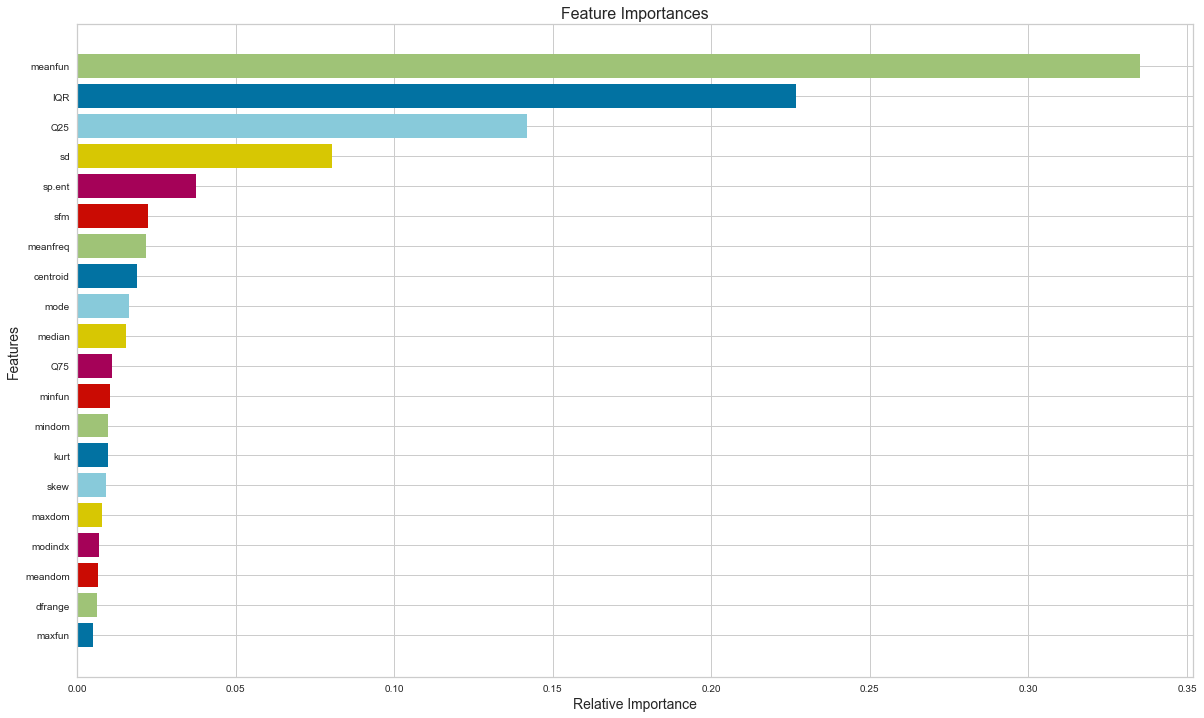

In [190]:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(feature_select, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [191]:
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(gender_master_data, y, test_size=0.25, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (2138, 20)
y_train shape:  (2138,)
X_test shape:  (713, 20)
y_test shape:  (713,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 2170 to 2238
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  2138 non-null   float64
 1   sd        2138 non-null   float64
 2   median    2138 non-null   float64
 3   Q25       2138 non-null   float64
 4   Q75       2138 non-null   float64
 5   IQR       2138 non-null   float64
 6   skew      2138 non-null   float64
 7   kurt      2138 non-null   float64
 8   sp.ent    2138 non-null   float64
 9   sfm       2138 non-null   float64
 10  mode      2138 non-null   float64
 11  centroid  2138 non-null   float64
 12  meanfun   2138 non-null   float64
 13  minfun    2138 non-null   float64
 14  maxfun    2138 non-null   float64
 15  meandom   2138 non-null   float64
 16  mindom    2138 non-null   float64
 17  maxdom    2138 non-null   float64
 18  dfrange

meanfreq        sd    median       Q25       Q75       IQR      skew  \
Id                                                                           
2170  0.193317  0.036190  0.195979  0.182117  0.212186  0.030069  2.679544   
1846  0.182051  0.056408  0.193285  0.175051  0.212735  0.037685  2.659047   
1714  0.230711  0.063126  0.251461  0.236147  0.261206  0.025059  3.445643   
2346  0.238730  0.034513  0.246690  0.224483  0.260690  0.036207  2.261478   
2662  0.190076  0.040772  0.185388  0.161948  0.215221  0.053272  2.163848   

           kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
Id                                                                            
2170  10.204351  0.854584  0.281481  0.192140  0.193317  0.185905  0.031809   
1846  11.830639  0.875828  0.410387  0.050246  0.182051  0.143441  0.015733   
1714  16.076526  0.834712  0.249656  0.251112  0.230711  0.229153  0.060837   
2346   7.855817  0.821816  0.170173  0.260690  0.238730  0.188405  0.048290   
2662   9.098955  0.881913  0.286016  0.161522  0.190076  0.151712  0.047952   

        maxfun   meandom    mindom     maxdom    dfrange   modindx  
Id                                                                  
2170  0.271186  0.673438  0.007812   5.945312   5.937500  0.169621  
1846  0.219178  0.196546  0.054688   0.695312   0.640625  0.146341  
1714  0.275862  0.880729  0.234375   4.992188   4.757812  0.205137  
2346  0.279070  1.350911  0.023438  10.757812  10.734375  0.071980  
2662  0.269663  1.118229  0.023438   8.039062   8.015625  0.122576

<a name = Section73></a>
### **7.3 Data Scaling**

- Trying to evaluate model without any scaling of data.

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a Logistic Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **F1 Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop Logistic Regression classification model using default setting.

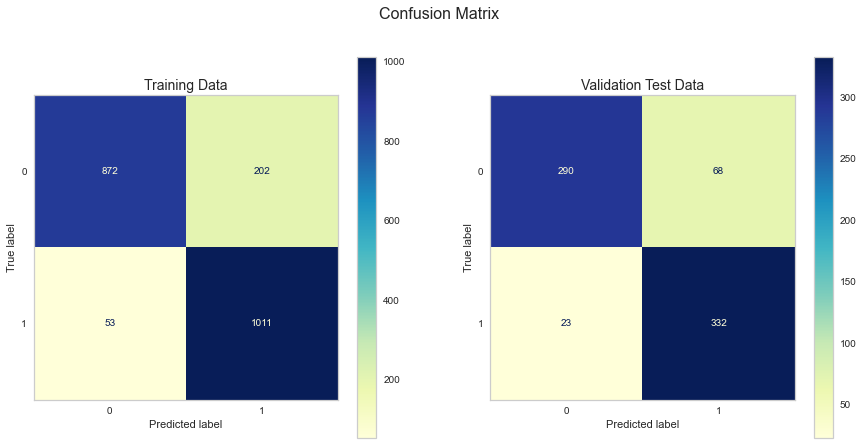

In [192]:
# Instantiate a Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Predicting training and testing labels
y_train_pred_count = logreg.predict(X_train)
y_test_pred_count = logreg.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=logreg, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=logreg, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [193]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count))

Accuracy score for test validation data is: 0.8723702664796634


In [194]:
print('Precision score for test validation data is :', precision_score(y_test,y_test_pred_count))

Precision score for test validation data is : 0.83


In [195]:
print('Recall score for test validation data is :', recall_score(y_test,y_test_pred_count))

Recall score for test validation data is : 0.9352112676056338


In [196]:
print('F1 score for test validation data is :', f1_score(y_test,y_test_pred_count))

F1 score for test validation data is : 0.8794701986754966


In [197]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Data Report          ')
print(train_report)
print('                    Test Validation Data Report           ')
print(test_report)

                    Training Data Report          
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1074
           1       0.83      0.95      0.89      1064

    accuracy                           0.88      2138
   macro avg       0.89      0.88      0.88      2138
weighted avg       0.89      0.88      0.88      2138

                    Test Validation Data Report           
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       358
           1       0.83      0.94      0.88       355

    accuracy                           0.87       713
   macro avg       0.88      0.87      0.87       713
weighted avg       0.88      0.87      0.87       713



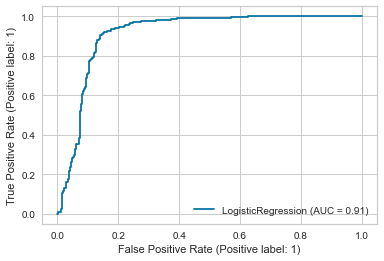

In [198]:
 roc_disp= plot_roc_curve(logreg, X_test, y_test)

- In this section we will **develop a Decision Tree model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **F1 Score** score as required by this project.

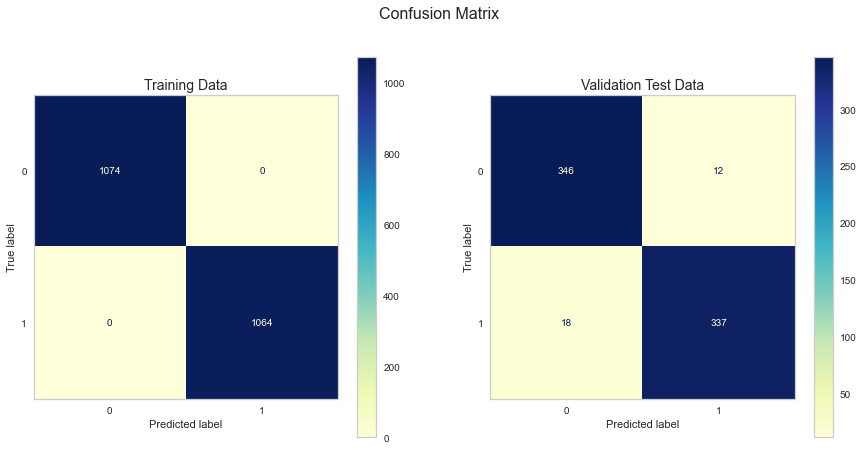

In [199]:
# Instantiate a decision tree classifier
dtc = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dtc.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count_dtc = dtc.predict(X_train)
y_test_pred_count_dtc = dtc.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=dtc, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=dtc, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [200]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count_dtc))

Accuracy score for test validation data is: 0.9579242636746143


In [201]:
print('Precision score for test validation data is :', precision_score(y_test,y_test_pred_count_dtc))

Precision score for test validation data is : 0.9656160458452722


In [202]:
print('Recall score for test validation data is :', recall_score(y_test,y_test_pred_count_dtc))

Recall score for test validation data is : 0.9492957746478873


In [203]:
print('F1 score for test validation data is :', f1_score(y_test,y_test_pred_count_dtc))

F1 score for test validation data is : 0.9573863636363636


In [204]:
train_report_dtc = classification_report(y_train, y_train_pred_count_dtc)
test_report_dtc = classification_report(y_test, y_test_pred_count_dtc)
print('                    Training Data Report          ')
print(train_report_dtc)
print('                    Test Validation Data Report           ')
print(test_report_dtc)

                    Training Data Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1074
           1       1.00      1.00      1.00      1064

    accuracy                           1.00      2138
   macro avg       1.00      1.00      1.00      2138
weighted avg       1.00      1.00      1.00      2138

                    Test Validation Data Report           
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       358
           1       0.97      0.95      0.96       355

    accuracy                           0.96       713
   macro avg       0.96      0.96      0.96       713
weighted avg       0.96      0.96      0.96       713



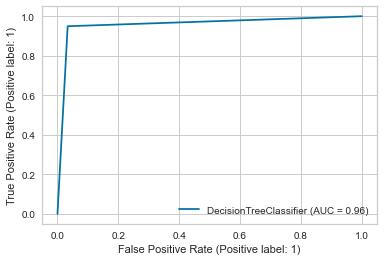

In [205]:
roc_disp= plot_roc_curve(dtc, X_test, y_test)

- In this section we will **develop a Random Forest model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **F1 Score** score as required by this project.

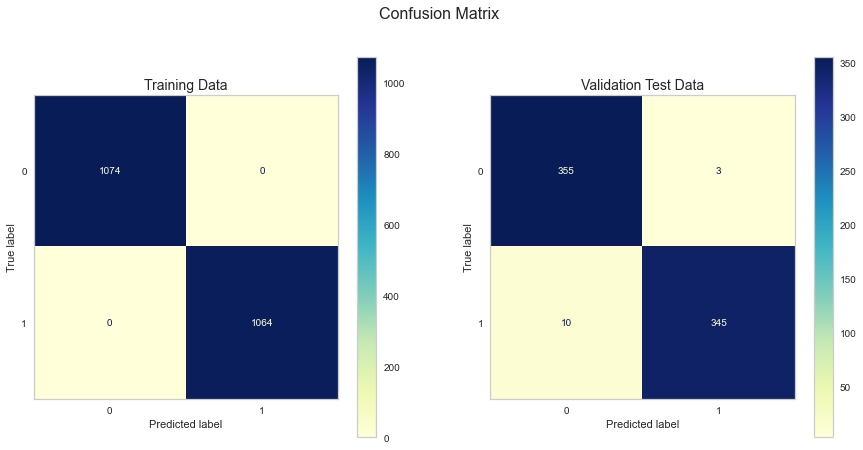

In [206]:
# Instantiate a random forest classifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count_clf = clf.predict(X_train)
y_test_pred_count_clf = clf.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=clf, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [207]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count_clf))

Accuracy score for test validation data is: 0.9817671809256662


In [208]:
print('Precision score for test validation data is :', precision_score(y_test,y_test_pred_count_clf))

Precision score for test validation data is : 0.9913793103448276


In [209]:
print('Recall score for test validation data is :', recall_score(y_test,y_test_pred_count_clf))

Recall score for test validation data is : 0.971830985915493


In [210]:
print('F1 score for test validation data is :', f1_score(y_test,y_test_pred_count_clf))

F1 score for test validation data is : 0.9815078236130867


In [211]:
train_report_clf = classification_report(y_train, y_train_pred_count_clf)
test_report_clf = classification_report(y_test, y_test_pred_count_clf)
print('                    Training Data Report          ')
print(train_report_clf)
print('                    Test Validation Data Report           ')
print(test_report_clf)

                    Training Data Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1074
           1       1.00      1.00      1.00      1064

    accuracy                           1.00      2138
   macro avg       1.00      1.00      1.00      2138
weighted avg       1.00      1.00      1.00      2138

                    Test Validation Data Report           
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       358
           1       0.99      0.97      0.98       355

    accuracy                           0.98       713
   macro avg       0.98      0.98      0.98       713
weighted avg       0.98      0.98      0.98       713



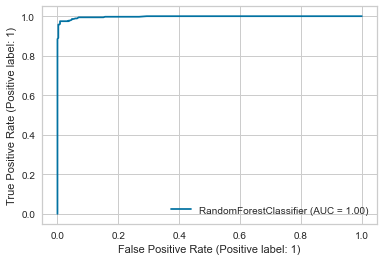

In [212]:
roc_disp= plot_roc_curve(clf, X_test, y_test)

In [221]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred = logreg.predict(gender_test_data)
y_test_pred
#print (y_test_pred.shape)
#print (y_test_pred)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [222]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred_dtc = dtc.predict(gender_test_data)
y_test_pred_dtc
#print (y_test_pred.shape)
#print (y_test_pred)

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [223]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred_clf = clf.predict(gender_test_data)
y_test_pred_clf
#print (y_test_pred.shape)
#print (y_test_pred)

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [224]:
output = pd.DataFrame({'Id': gender_test_data.index,'label': y_test_pred})
output.to_csv('gender-recognition-submission1.csv', index=False, header=False)

In [225]:
output = pd.DataFrame({'Id': gender_test_data.index,'label': y_test_pred_dtc})
output.to_csv('gender-recognition-submission2.csv', index=False, header=False)

In [226]:
output = pd.DataFrame({'Id': gender_test_data.index,'label': y_test_pred_clf})
output.to_csv('gender-recognition-submission3.csv', index=False, header=False)

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- Model with best F1-Score was used for model evaluation and prediction considering this is ML Intermediate project.
- F1-Score was used to arrive at model evaluation which indicates good score for Test Validation data used.
- Correlation Heatmap shows linear relationship between Numeric features and Target Variable.
- Below we have comparison with Logistic, Decision Tree and Random Forest model.



|Sl. No.|| Model Name || Accuracy || Precision || Recall ||F1-Score||AUC|
|----||---------||------------||-------------||----------||---------||----|
|1|| Logistic Regression Model|| 0.872||0.830||0.935|| 0.879||0.91|
|2|| Decision Tree Model|| 0.957||0.965||0.949|| 0.957||0.96 |
|3|| Random Forest Model|| 0.981||0.991||0.971|| 0.981|| 1.00|